# Hackathon

loading the data 

In [1]:
import pandas as pd

In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [4]:
engine_df = pd.read_csv('engine_data.csv')
engine_df["Engine Condition"] = engine_df["Engine Condition"].astype('category')

In [5]:
engine_df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


In [7]:
engine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Engine rpm        19535 non-null  int64   
 1   Lub oil pressure  19535 non-null  float64 
 2   Fuel pressure     19535 non-null  float64 
 3   Coolant pressure  19535 non-null  float64 
 4   lub oil temp      19535 non-null  float64 
 5   Coolant temp      19535 non-null  float64 
 6   Engine Condition  19535 non-null  category
dtypes: category(1), float64(5), int64(1)
memory usage: 935.0 KB


In [6]:
engine_df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912


In [6]:
engine_df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [14]:
engine_df["Engine Condition"].value_counts()

Engine Condition
1    12317
0     7218
Name: count, dtype: int64

In [15]:
engine_df["Engine Condition"].value_counts()/len(engine_df["Engine Condition"])

Engine Condition
1    0.630509
0    0.369491
Name: count, dtype: float64

# Creating new Features 

# Inverse features 

In [16]:
engine_df["inv_rpm"] = 1.0/ engine_df['Engine rpm'] 
engine_df["inv_lub_p"] = 1.0/ engine_df['Lub oil pressure'] 
engine_df["inv_fuel_p"] = 1.0/ engine_df['Fuel pressure'] 
engine_df["inv_cool_p"] = 1.0/ engine_df['Coolant pressure'] 
engine_df["inv_oil_temp"] = 1.0/ engine_df['lub oil temp'] 
engine_df["inv_coll_t"] = 1.0/ engine_df['Coolant temp'] 
engine_df["lub P/T"] = engine_df["Lub oil pressure"] / engine_df["lub oil temp"]
engine_df["Coolant P/T"] = engine_df["Coolant pressure"] / engine_df["Coolant temp"]
engine_df["lub T/P"] = 1.0/ engine_df["lub P/T"]
engine_df["coolant T/P"] = 1.0/ engine_df["Coolant P/T"]


# train val test split

In [346]:
train_val_df,test_df = train_test_split(engine_df,test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(engine_df,test_size = 0.25, random_state = 42)
target_col = 'Engine Condition'
input_cols = list(engine_df.columns)
input_cols.remove(target_col)

In [347]:
input_cols

['Engine rpm',
 'Lub oil pressure',
 'Fuel pressure',
 'Coolant pressure',
 'lub oil temp',
 'Coolant temp',
 'inv_rpm',
 'inv_lub_p',
 'inv_fuel_p',
 'inv_cool_p',
 'inv_oil_temp',
 'inv_coll_t',
 'lub P/T',
 'Coolant P/T',
 'lub T/P',
 'coolant T/P']

In [348]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [349]:
len(train_inputs)

14651

In [350]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [351]:
len(val_inputs)

4884

In [352]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

# Dealing with data Imbalace

In [23]:
from imblearn.over_sampling import SMOTE

counter = Counter(train_targets)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
train_inputs_sm, train_targets_sm = smt.fit_resample(train_inputs, train_targets)

counter = Counter(train_targets_sm)
print('After',counter)

Before Counter({1: 9269, 0: 5382})
After Counter({0: 9269, 1: 9269})


# Data Preprocessing 

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(engine_df[input_cols])

StandardScaler()

In [28]:
train_inputs_sm[input_cols] = scaler.transform(train_inputs_sm)
val_inputs[input_cols] = scaler.transform(val_inputs)
test_inputs[input_cols] = scaler.transform(test_inputs)

## Training Different Models 

In [29]:
from sklearn.linear_model import LogisticRegression 

In [30]:
model = LogisticRegression(solver='liblinear')

In [31]:
model.fit(train_inputs_sm, train_targets_sm)

LogisticRegression(solver='liblinear')

In [32]:
print(model.coef_.tolist())

[[0.0865430772155231, -0.5871357289760204, 0.2852964786607876, -0.4783540556061083, 2.272491349901544, 1.062034061577277, 0.849707381196814, 0.6735966778670497, -0.12782563610434045, -0.38432265210288524, 2.322395689687408, 1.043597439908991, 0.7589616126534211, 0.39818672935641053, -0.6134085973235035, 0.29704199778385104]]


In [33]:
print(model.intercept_)

[0.10661812]


In [34]:
weight_df= pd.DataFrame({
    'feature': list(train_inputs_sm.columns),
    'weights': model.coef_[0]
})
weight_df

,feature,weights
0,Engine rpm,0.086543
1,Lub oil pressure,-0.587136
2,Fuel pressure,0.285296
3,Coolant pressure,-0.478354
4,lub oil temp,2.272491
5,Coolant temp,1.062034
6,inv_rpm,0.849707
7,inv_lub_p,0.673597
8,inv_fuel_p,-0.127826
9,inv_cool_p,-0.384323


model features and their weights

<Axes: xlabel='weights', ylabel='feature'>

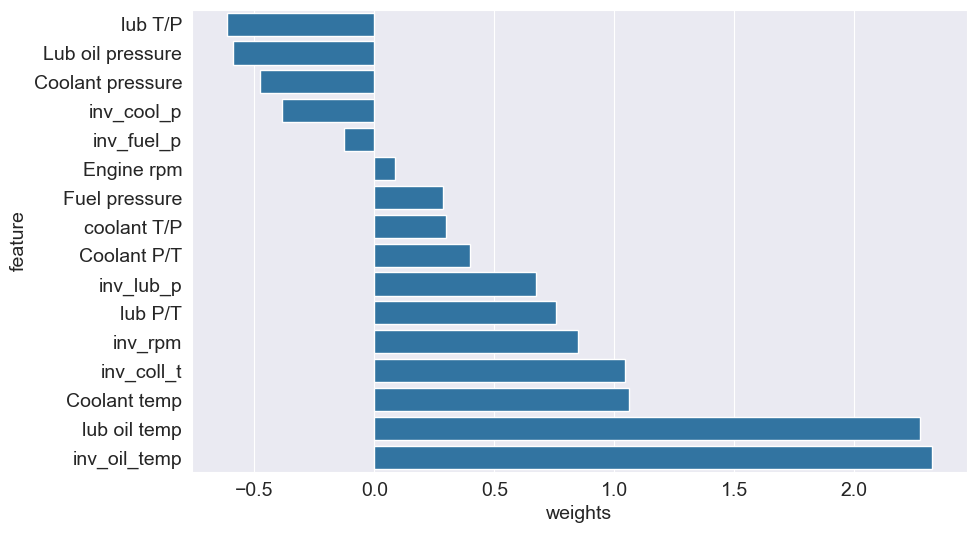

In [35]:

sns.barplot(data= weight_df.sort_values('weights',ascending=True),x='weights',y='feature')

<Axes: xlabel='weights', ylabel='feature'>

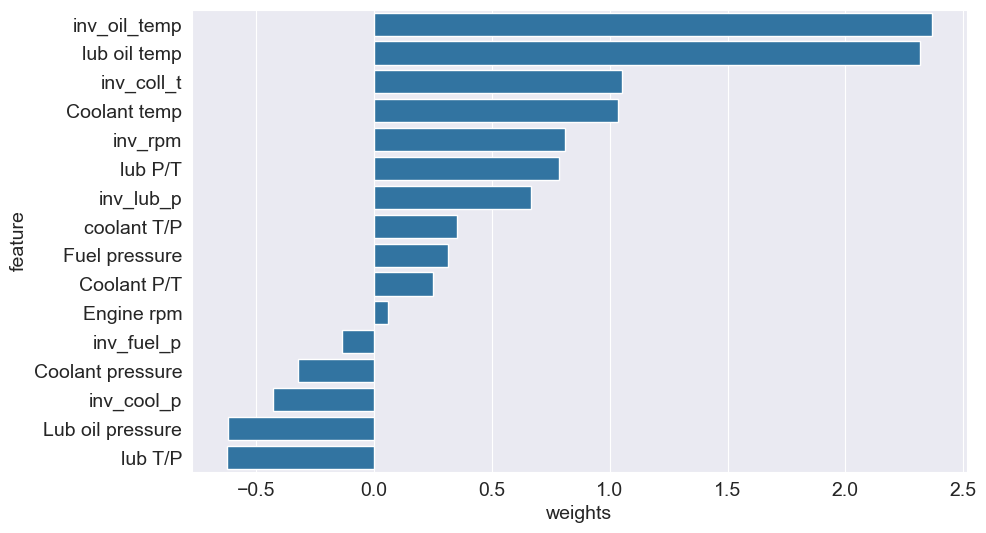

In [28]:
sns.barplot(data = weight_df.sort_values('weights',ascending=False),x='weights',y='feature')

## Making Predictions and Evaluating the Model

In [36]:
X_train = train_inputs_sm
X_val = val_inputs
X_test = test_inputs

In [37]:
train_preds = model.predict(X_train)

In [38]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.56040479, 0.43959521],
       [0.51080162, 0.48919838],
       [0.52819123, 0.47180877],
       ...,
       [0.54952051, 0.45047949],
       [0.69016584, 0.30983416],
       [0.45322092, 0.54677908]])

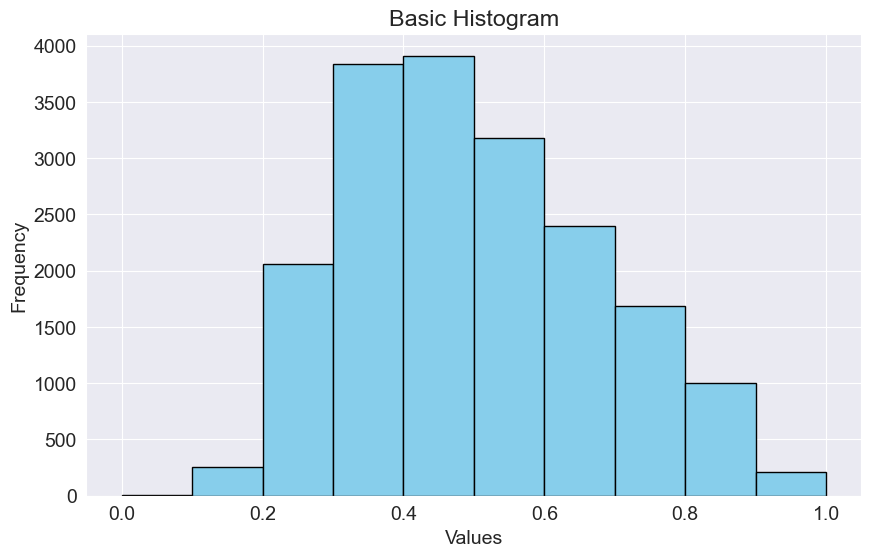

In [39]:

import matplotlib.pyplot as plt
import numpy as np
 
# Generate random data for the histogram
data = train_probs[:, 1]
 
# Plotting a basic histogram
plt.hist(data, bins=10, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

In [40]:
model.classes_

array([0, 1], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(train_targets_sm, train_preds)

0.6509871615060956

In [43]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(train_targets_sm, train_preds, normalize='all')

array([[0.34707088, 0.15292912],
       [0.19608372, 0.30391628]])

In [46]:
def predict_and_plot(model,inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print(name + " Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='all')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return accuracy*100

Training Accuracy: 65.10%


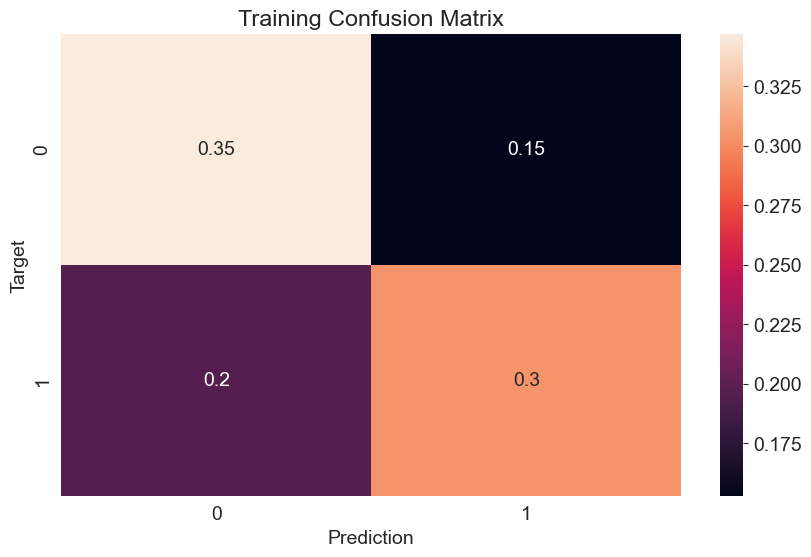

In [47]:
train_preds = predict_and_plot(model,X_train, train_targets_sm, 'Training')

Validatiaon Accuracy: 63.45%


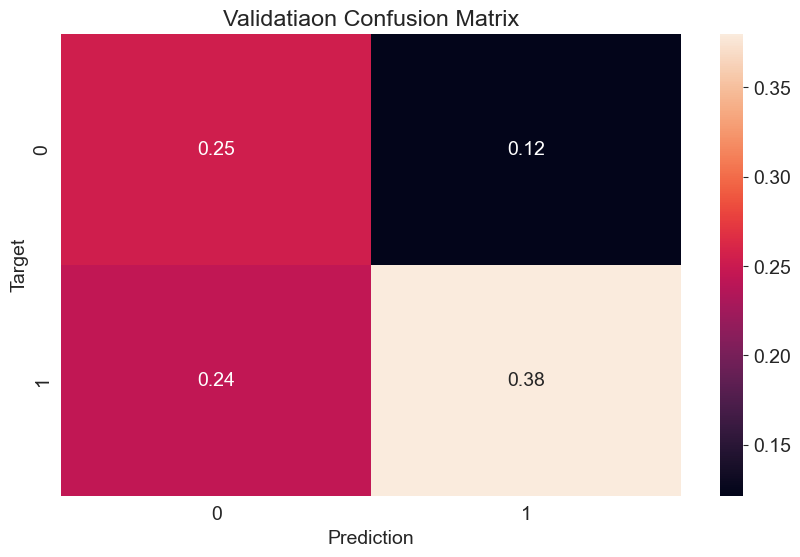

In [48]:
val_preds = predict_and_plot(model,X_val, val_targets, 'Validatiaon')

In [49]:
def test_param(**param):
    m = LogisticRegression(**param)
    m.fit(X_train, train_targets_sm)
    k = predict_and_plot(m,X_train, train_targets_sm, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k,v


In [50]:
best_model = pd.DataFrame()
row_num= 0

Training Accuracy: 65.10%
Validatiaon Accuracy: 63.45%


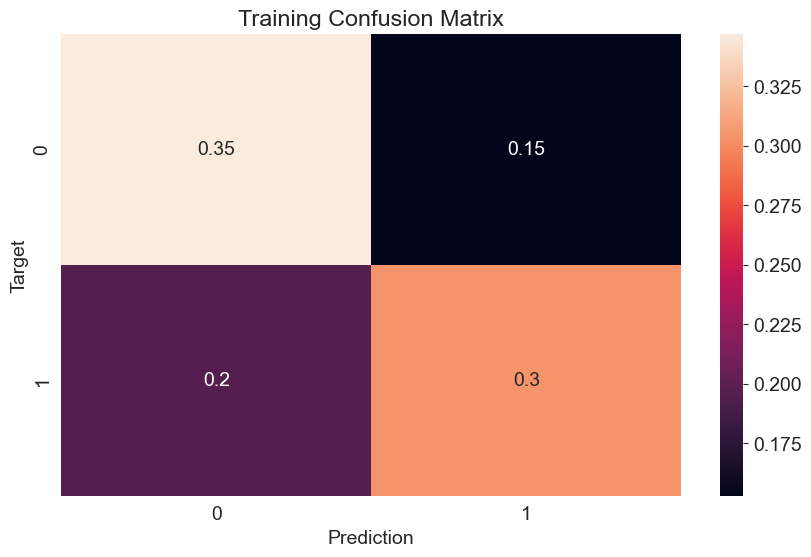

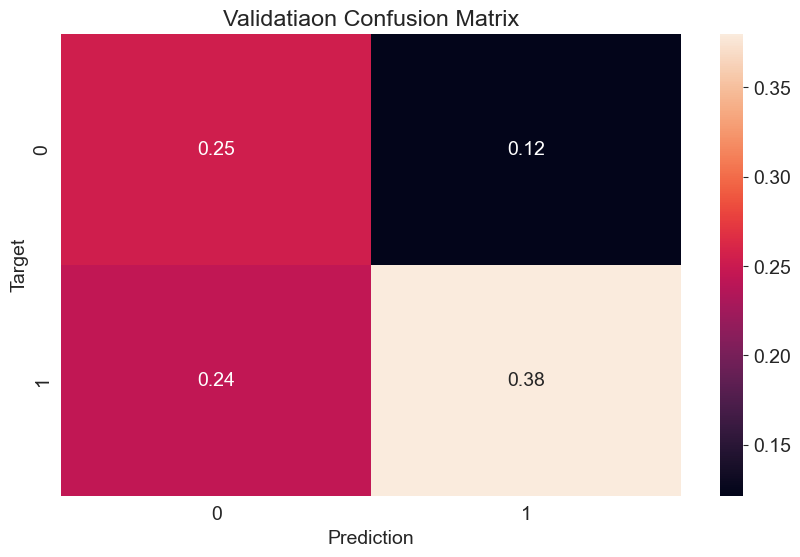

In [52]:
val = test_param(solver = 'liblinear')

In [53]:
best_model.loc[row_num, 'Model'] = 'Logistic Regression'
best_model.loc[row_num, 'Training Accuracy'] = val[0]
best_model.loc[row_num, "Validation Accuracy"] = val[1]

best_model

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,65.098716,63.452088


In [54]:
row_num+=1

Training Accuracy: 65.11%
Validatiaon Accuracy: 63.45%


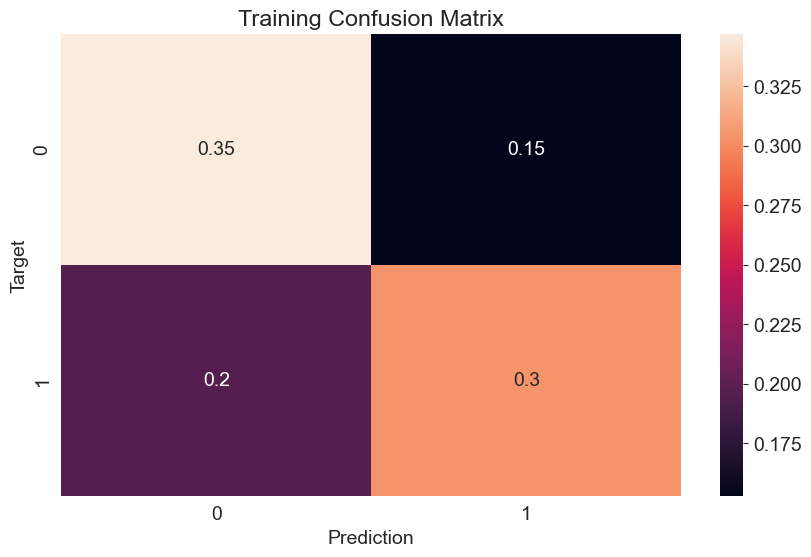

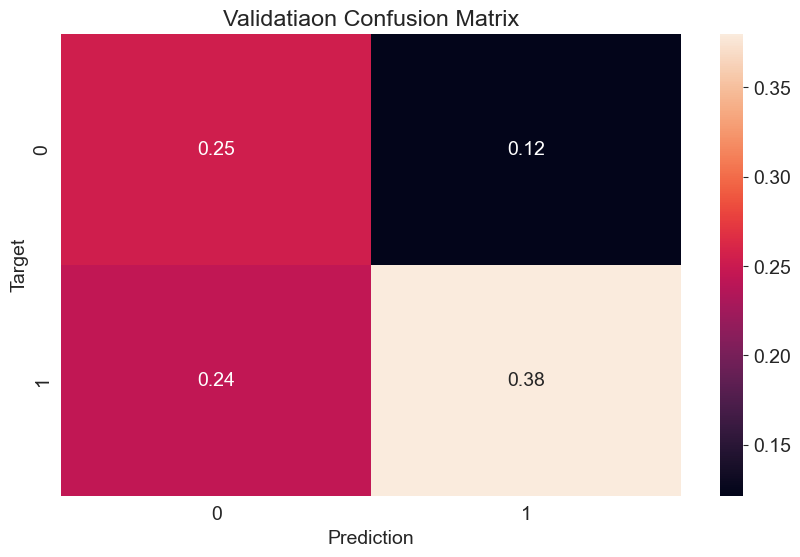

In [55]:
val = test_param(solver ='newton-cg')

Training Accuracy: 65.09%
Validatiaon Accuracy: 63.49%


(65.08792750026971, 63.49303849303849)

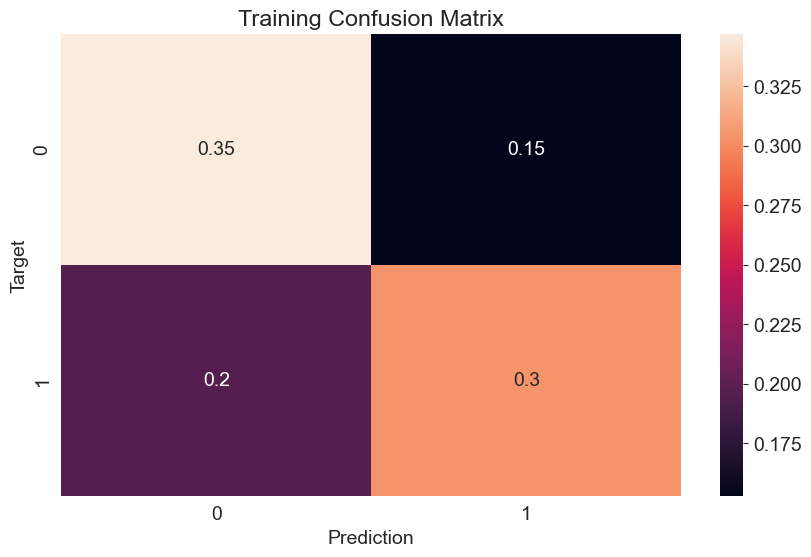

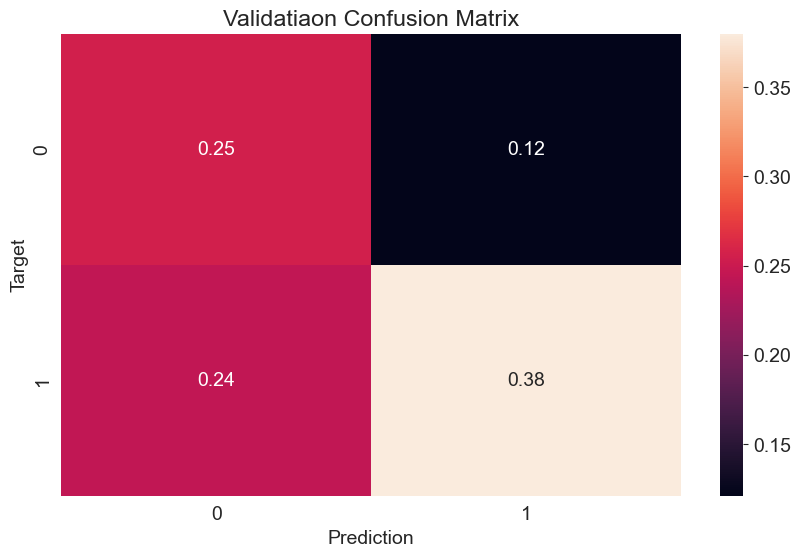

In [56]:
test_param(solver ='lbfgs',max_iter = 100)


Training Accuracy: 65.11%
Validatiaon Accuracy: 63.49%


c:\Users\vpoother\OneDrive\OneDrive - JLR\Desktop\Hackathon\.venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(65.10950480094941, 63.49303849303849)

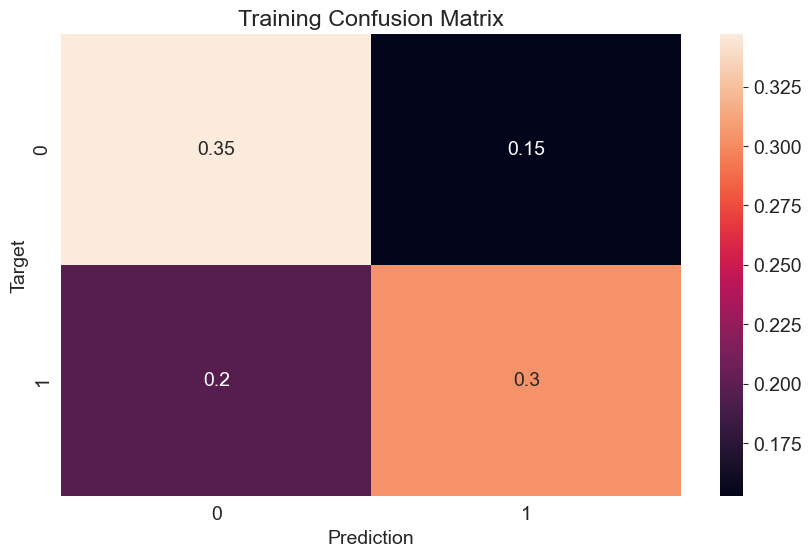

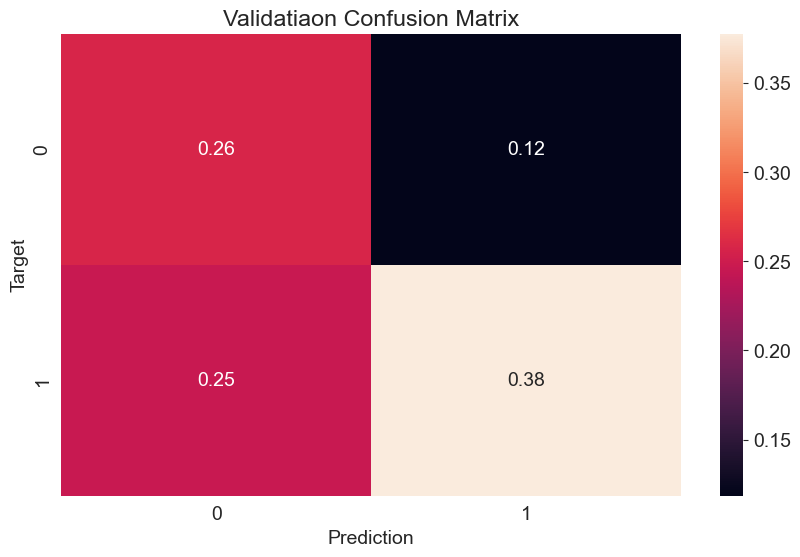

In [57]:
test_param(solver ='saga',max_iter = 1000)


## Naive Bayes

## 1.Gausian

In [59]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

In [60]:
def test_param(**param):
    m = GaussianNB(**param)
    m.fit(X_train, train_targets_sm)
    k = predict_and_plot(m,X_train, train_targets_sm, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k, v


Training Accuracy: 50.31%
Validatiaon Accuracy: 62.41%


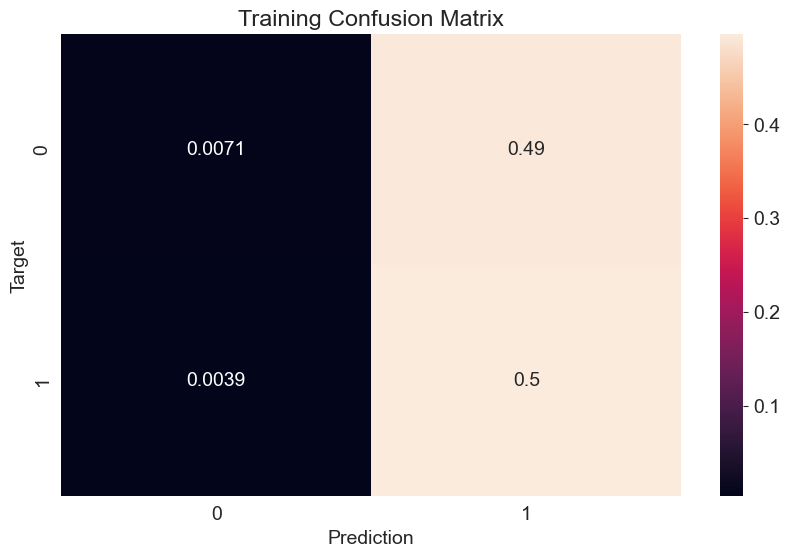

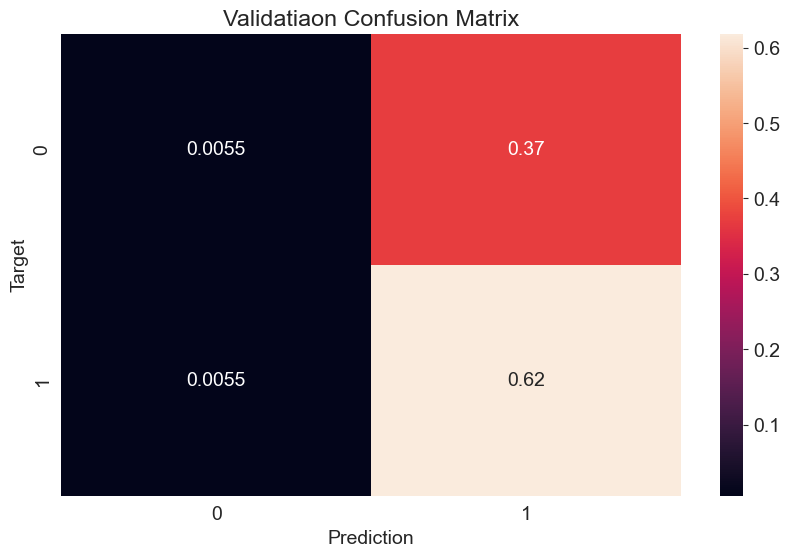

In [61]:
val = test_param()

In [62]:
best_model.loc[row_num, 'Model'] = 'Naive Bayes'
best_model.loc[row_num, 'Training Accuracy'] = val[0]
best_model.loc[row_num, "Validation Accuracy"] = val[1]

best_model

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,65.098716,63.452088
1,Naive Bayes,50.312871,62.407862


## 2. Bernouli

In [63]:
from sklearn.naive_bayes import BernoulliNB

In [64]:
def test_param(**param):
    m = BernoulliNB(**param)
    m.fit(X_train, train_targets_sm)
    predict_and_plot(m,X_train, train_targets_sm, 'Training')
    predict_and_plot(m,X_val, val_targets, 'Validatiaon')


Training Accuracy: 63.16%
Validatiaon Accuracy: 63.00%


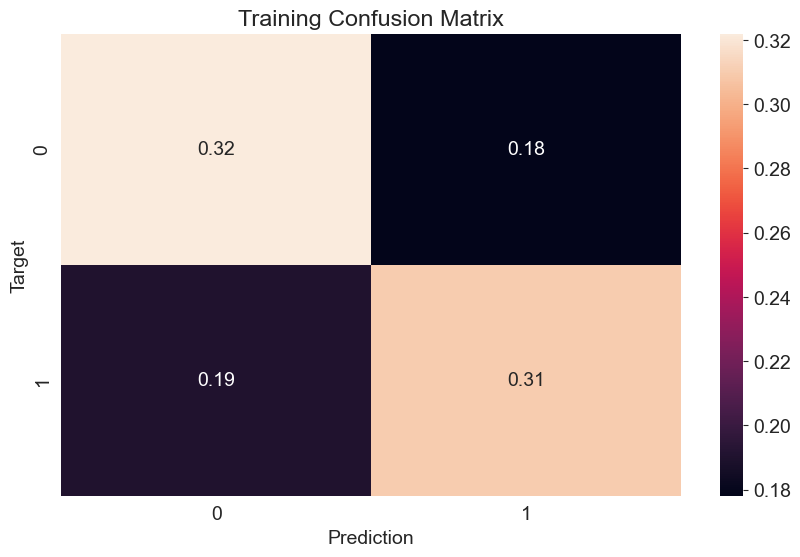

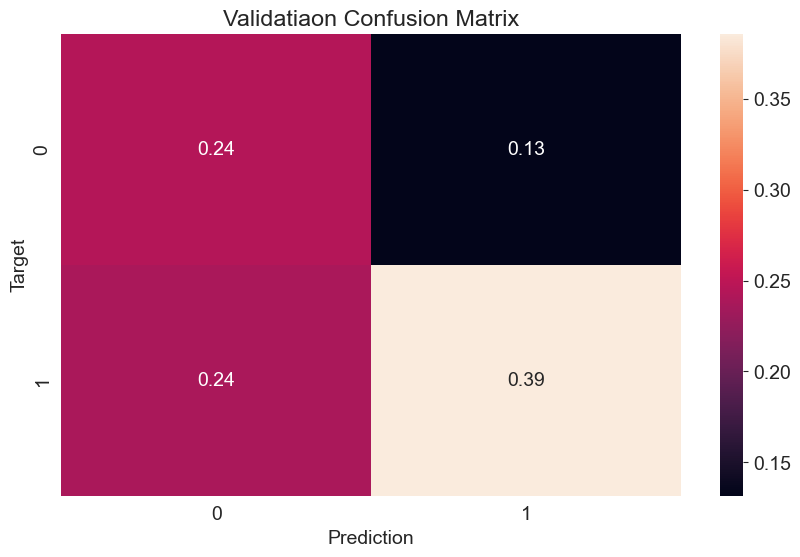

In [65]:
test_param()


## Decision Tree Classifier


In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
def test_param(**param):
    m = DecisionTreeClassifier(random_state=42,**param)
    m.fit(X_train, train_targets_sm)
    k = predict_and_plot(m,X_train, train_targets_sm, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k ,v

Training Accuracy: 100.00%
Validatiaon Accuracy: 56.72%


(100.0, 56.715806715806714)

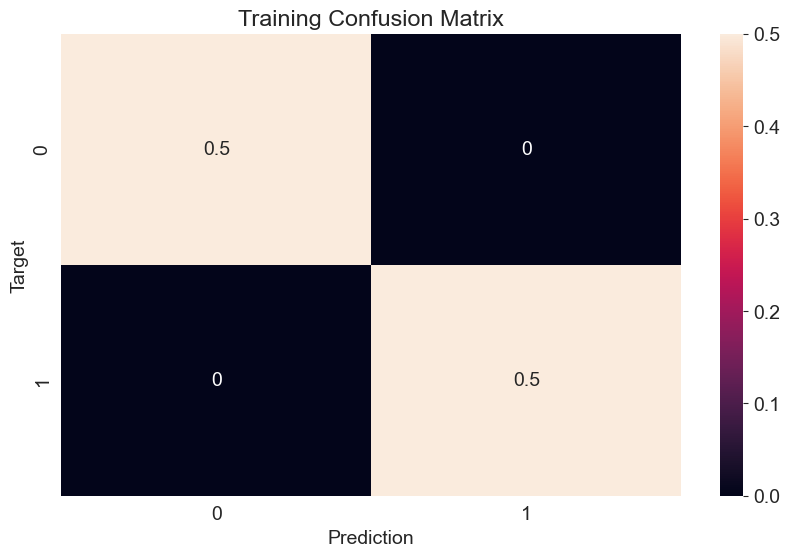

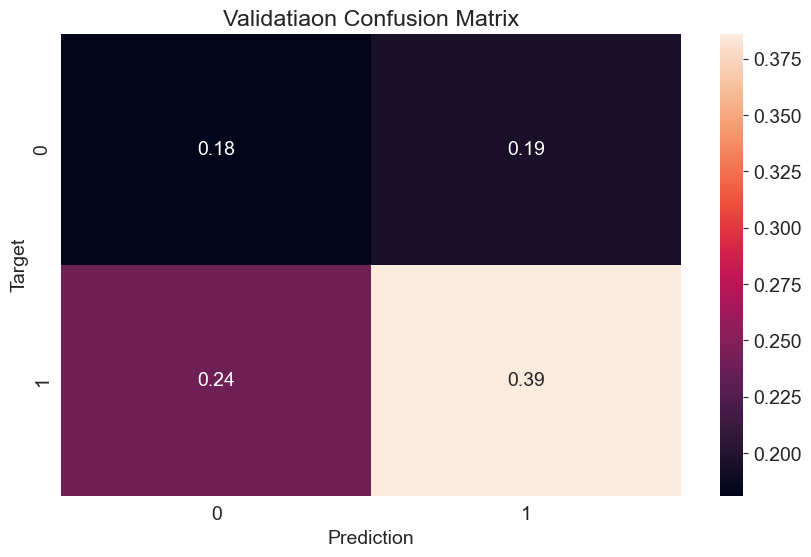

In [68]:
test_param()

In [69]:
def max_depth_error(md):
    model = DecisionTreeClassifier(criterion= "gini",max_depth=md, random_state=42)
    model.fit(X_train, train_targets_sm)
    train_acc = 1 - model.score(X_train, train_targets_sm)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc }

In [70]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 30)])

CPU times: total: 7.39 s
Wall time: 7.41 s


In [71]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.372694,0.381654
1,2,0.372694,0.381654
2,3,0.363847,0.415029
3,4,0.350901,0.393939
4,5,0.346801,0.386364
5,6,0.336444,0.382883
6,7,0.327058,0.387592
7,8,0.314327,0.389230
8,9,0.296418,0.387592
9,10,0.279480,0.398444


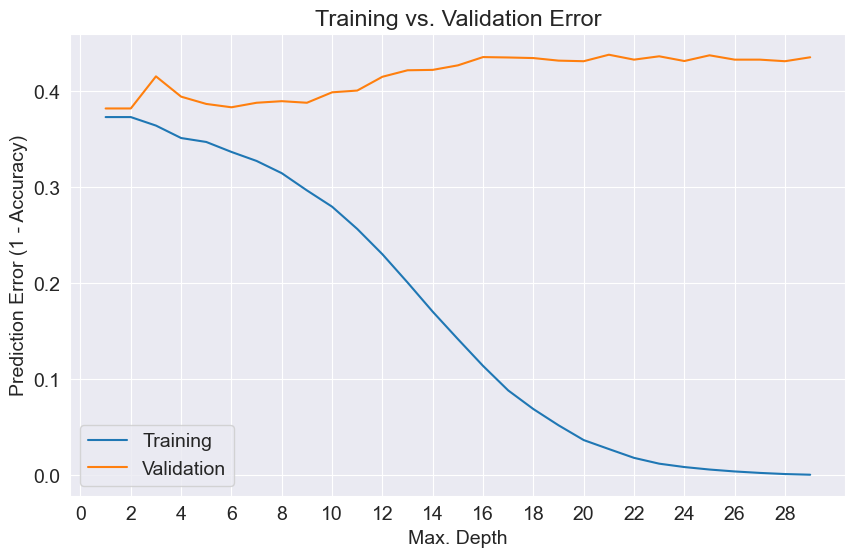

In [72]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,30, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [73]:
def max_leaf_nodes_error(mln):
    model = DecisionTreeClassifier(criterion= "gini",max_leaf_nodes=mln, random_state=42)
    model.fit(X_train, train_targets_sm)
    train_acc = 1 - model.score(X_train, train_targets_sm)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Leaf Node': mln, 'Training Error': train_acc, 'Validation Error': val_acc }

In [74]:
%%time
errors_df = pd.DataFrame([max_leaf_nodes_error(mln) for mln in range(10, 100)])

CPU times: total: 15.8 s
Wall time: 15.8 s


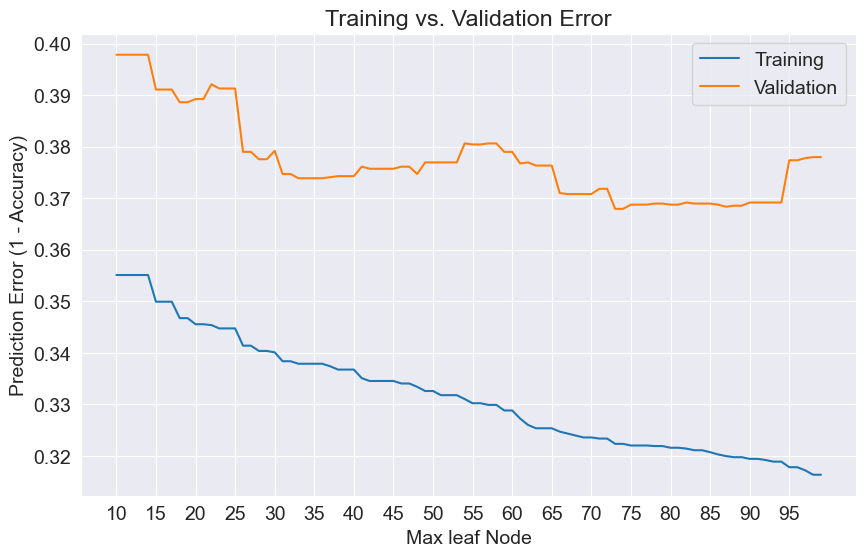

In [75]:
plt.figure()
plt.plot(errors_df['Max Leaf Node'], errors_df['Training Error'])
plt.plot(errors_df['Max Leaf Node'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(10,100, 5))
plt.xlabel('Max leaf Node')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

Training Accuracy: 67.48%
Validatiaon Accuracy: 61.61%


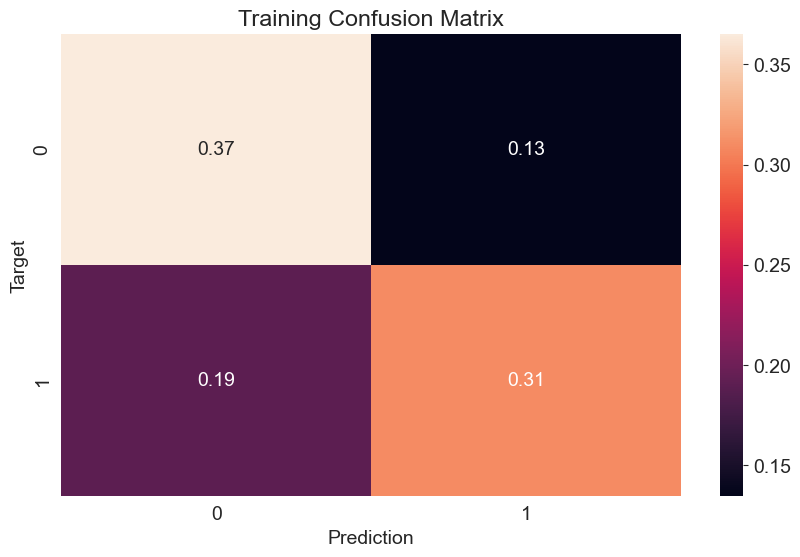

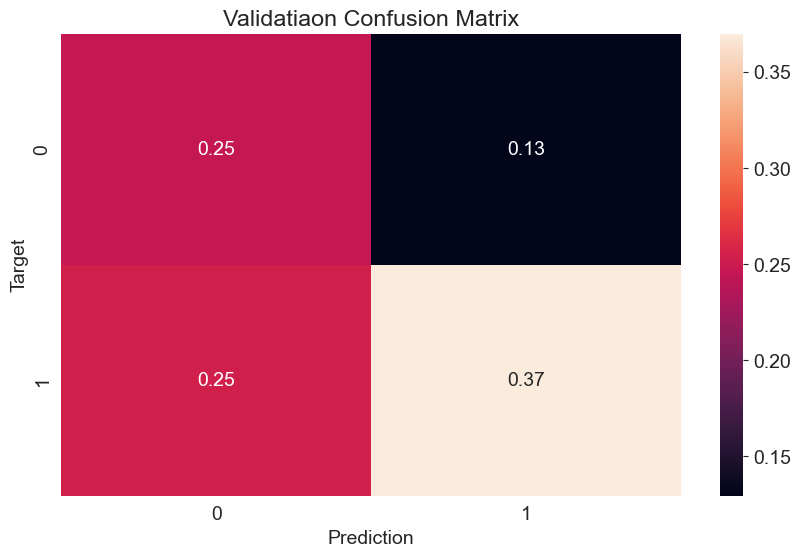

In [76]:
val = test_param(criterion= "gini",max_depth=8,max_leaf_nodes=74)

In [77]:
row_num+=1

In [78]:
best_model.loc[row_num, 'Model'] = 'Decision Tree '
best_model.loc[row_num, 'Training Accuracy'] = val[0]
best_model.loc[row_num, "Validation Accuracy"] = val[1]

best_model

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,65.098716,63.452088
1,Naive Bayes,50.312871,62.407862
2,Decision Tree,67.477614,61.609337


In [79]:
best_decision_tree_model = DecisionTreeClassifier(random_state=42,criterion= "gini",max_depth=7,max_leaf_nodes=25)

In [80]:
best_decision_tree_model.fit(X_train, train_targets_sm)


DecisionTreeClassifier(max_depth=7, max_leaf_nodes=25, random_state=42)

In [81]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_decision_tree_model.feature_importances_
}).sort_values('importance', ascending=False)

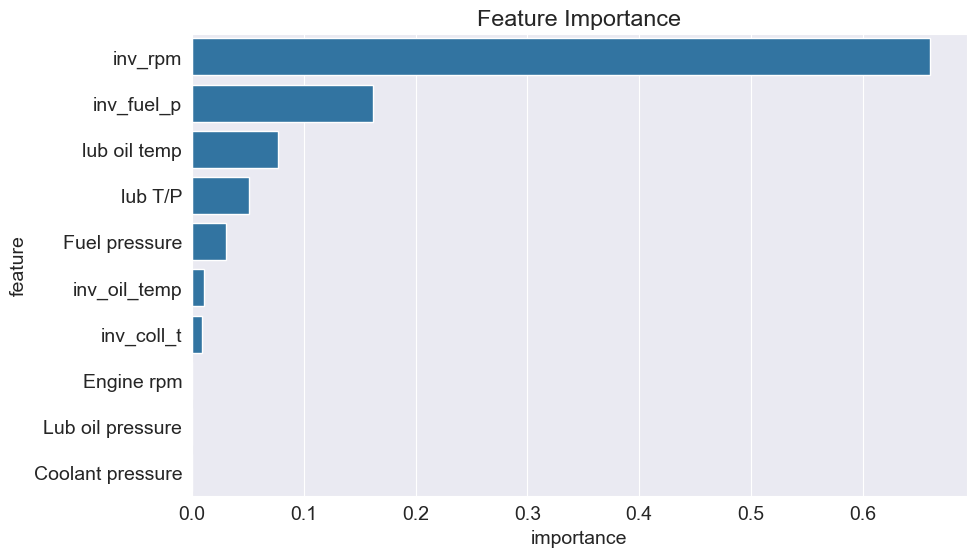

In [82]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
def test_params(params={},**para):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params , **para).fit(X_train, train_targets_sm)
    return model.score(X_train, train_targets_sm), model.score(X_val, val_targets)

In [85]:
test_params()

(1.0, 0.6287878787878788)

In [86]:
parameter_list = []

parameter_list.append("max_depth")

In [87]:
def error_df(para , md):
    model_acc = test_params({para:md})
    train_acc = 1 - model_acc[0]
    val_acc = 1 - model_acc[1]
    return {para: md, 'Training Error': train_acc, 'Validation Error': val_acc }

In [88]:
%%time
errors_df = pd.DataFrame([error_df("max_depth",md) for md in range(1, 30)])

CPU times: total: 4min 8s
Wall time: 17.7 s


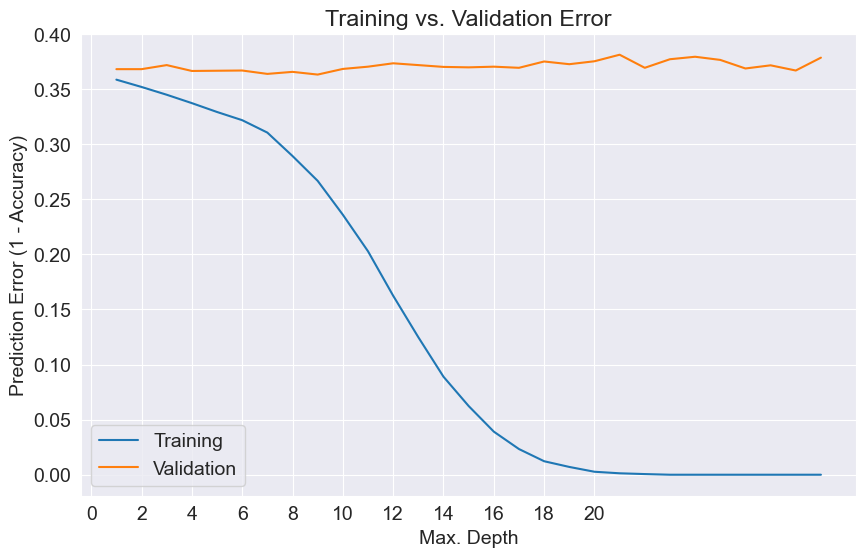

In [89]:
v = parameter_list[0]
plt.figure()
plt.plot(errors_df[v], errors_df['Training Error'])
plt.plot(errors_df[v], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [90]:
best_params = {
    "max_depth" :7
}

In [91]:
parameter_list.append("max_leaf_nodes")

In [92]:
errors_df = pd.DataFrame([error_df("max_leaf_nodes",md) for md in range(10,80)])

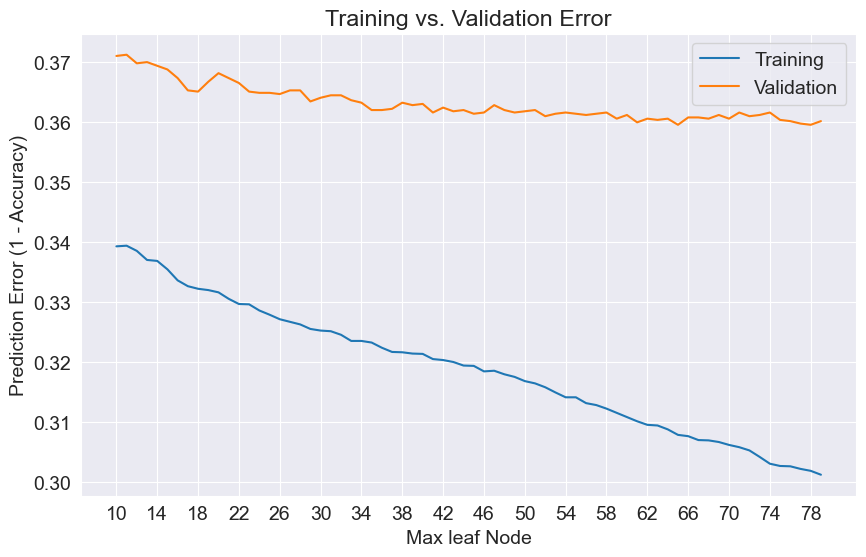

In [93]:
v = parameter_list[1]
plt.figure()
plt.plot(errors_df[v], errors_df['Training Error'])
plt.plot(errors_df[v], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(10,80, 4))
plt.xlabel('Max leaf Node')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [94]:
best_params[parameter_list[1]]=65
best_params

{'max_depth': 7, 'max_leaf_nodes': 65}

In [95]:
test_params(best_params)

(0.6856726723486892, 0.6353398853398854)

In [96]:
def error_df(para , md):
    model_acc = test_params({para:md},**best_params)
    train_acc = 1 - model_acc[0]
    val_acc = 1 - model_acc[1]
    return {para: md, 'Training Error': train_acc, 'Validation Error': val_acc }

In [97]:
errors_df = pd.DataFrame([error_df("n_estimators",md) for md in range(1, 100)])


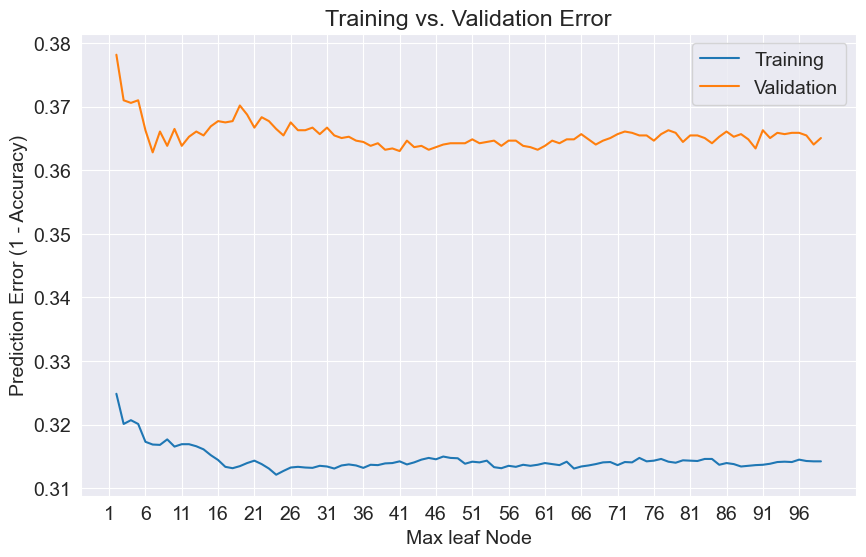

In [98]:
v = "n_estimators"
plt.figure()
plt.plot(errors_df[v].loc[1:100], errors_df['Training Error'].loc[1:100])
plt.plot(errors_df[v].loc[1:100], errors_df['Validation Error'].loc[1:100])
plt.title('Training vs. Validation Error')
plt.xticks(range(1,100, 5))
plt.xlabel('Max leaf Node')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [99]:
best_params["n_estimators"] = 41
model.classes_

array([0, 1], dtype=int64)

In [100]:
best_params

{'max_depth': 7, 'max_leaf_nodes': 65, 'n_estimators': 41}

In [101]:
val = test_params(best_params,class_weight={1: 1, 0: 1})
val

(0.6857805588520876, 0.6369778869778869)

In [102]:
def test_param():
    m = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params ,class_weight={1: 1, 0: 1})
    m.fit(X_train, train_targets_sm)
    k = predict_and_plot(m,X_train, train_targets_sm, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k ,v


Training Accuracy: 68.58%
Validatiaon Accuracy: 63.70%


(68.57805588520876, 63.697788697788695)

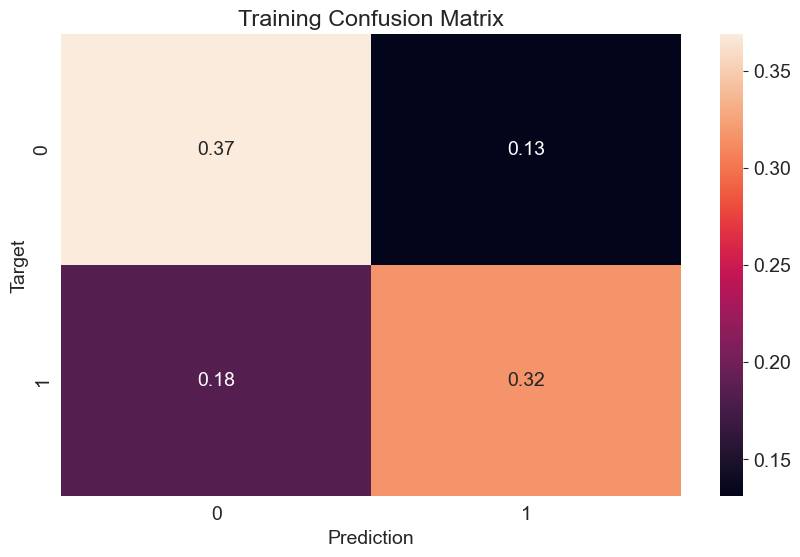

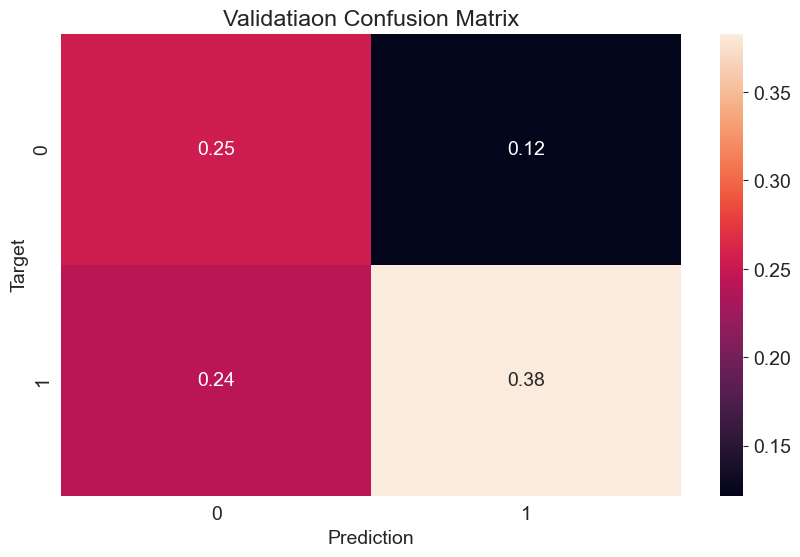

In [103]:
test_param()

In [104]:
row_num+=1

In [105]:
best_model.loc[row_num, 'Model'] = 'Random Forest'
best_model.loc[row_num, 'Training Accuracy'] = val[0]*100
best_model.loc[row_num, "Validation Accuracy"] = val[1]*100

best_model

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,65.098716,63.452088
1,Naive Bayes,50.312871,62.407862
2,Decision Tree,67.477614,61.609337
3,Random Forest,68.578056,63.697789


## svm classifier

In [106]:
from sklearn.svm import SVC

In [107]:
def test_param(**param):
    m = SVC(random_state = 25,**param)
    m.fit(X_train, train_targets_sm)
    k = predict_and_plot(m,X_train, train_targets_sm, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k,v

Training Accuracy: 66.32%
Validatiaon Accuracy: 63.21%


(66.32322796418168, 63.20638820638821)

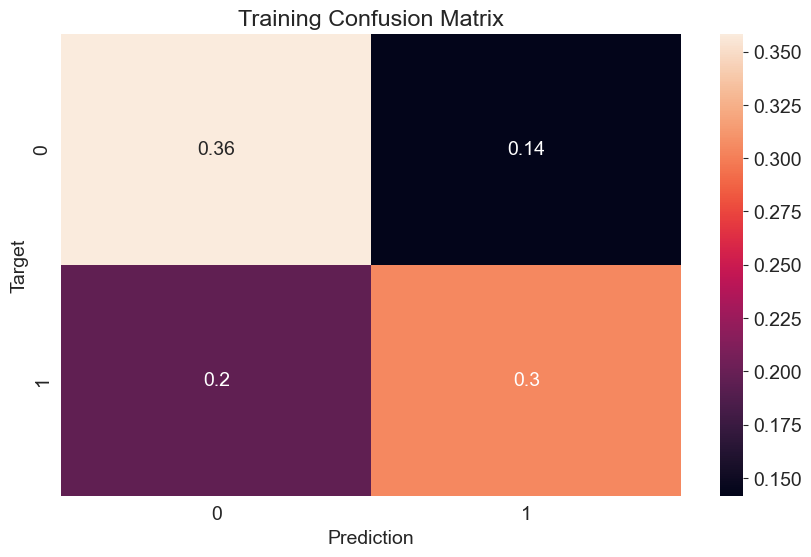

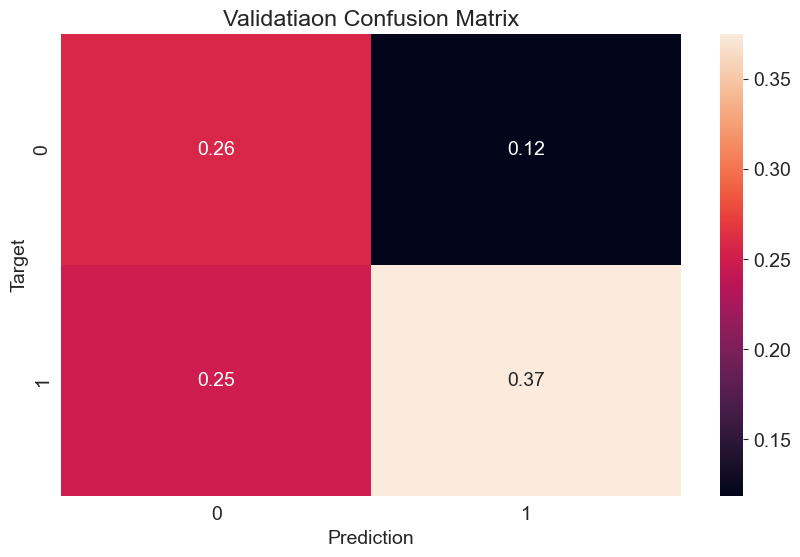

In [108]:
test_param()

Training Accuracy: 66.84%
Validatiaon Accuracy: 62.84%


(66.8356888553242, 62.83783783783784)

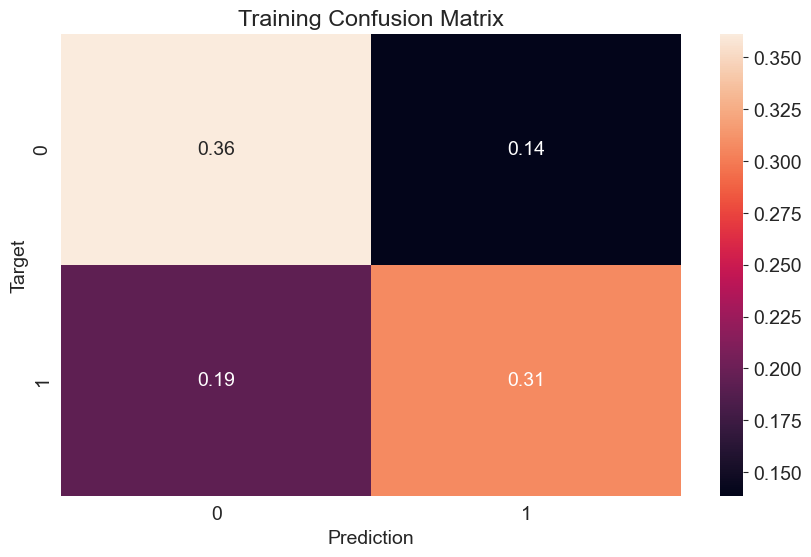

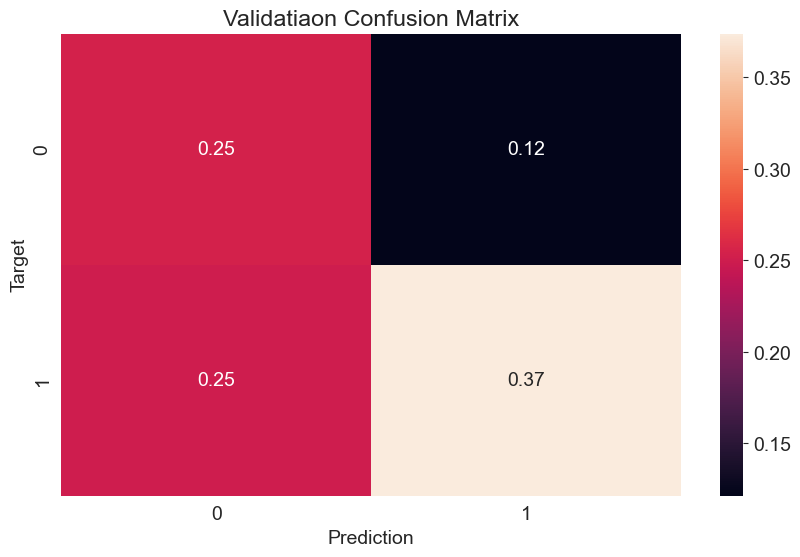

In [109]:
test_param(C = 3)

Training Accuracy: 64.73%
Validatiaon Accuracy: 62.37%


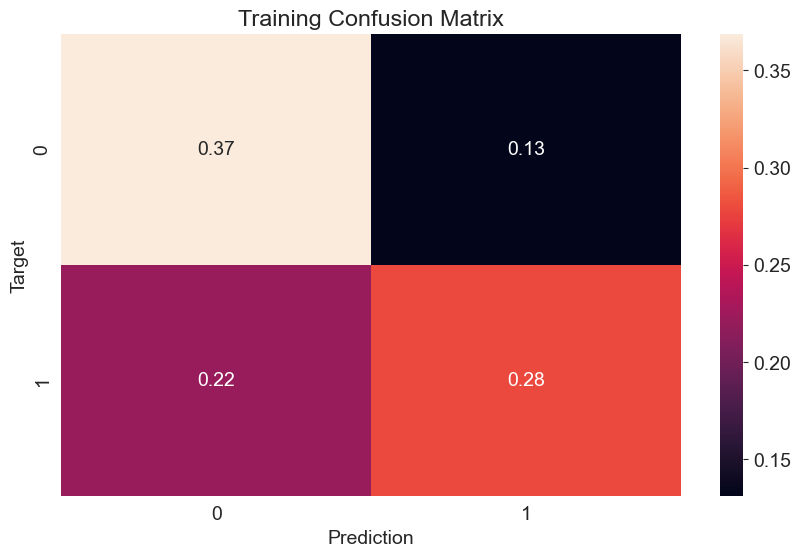

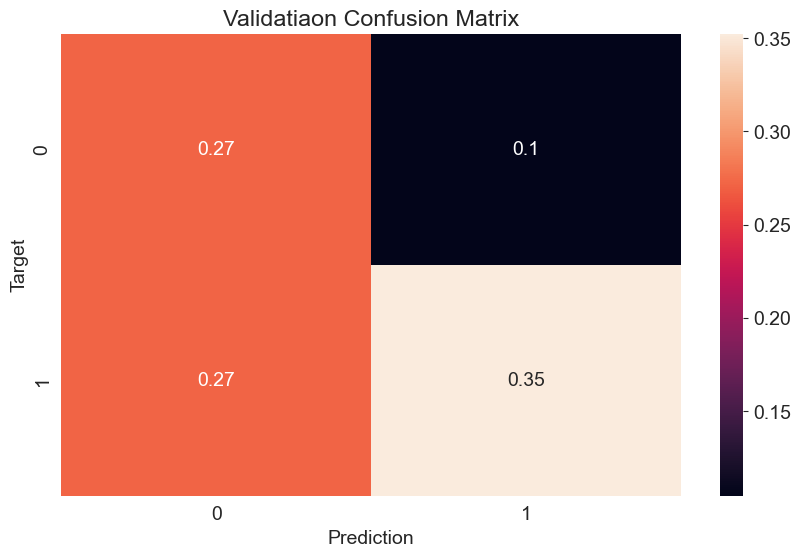

In [110]:
val = test_param(kernel='linear',C = 1)

Training Accuracy: 58.93%
Validatiaon Accuracy: 51.35%


(58.927608156219655, 51.35135135135135)

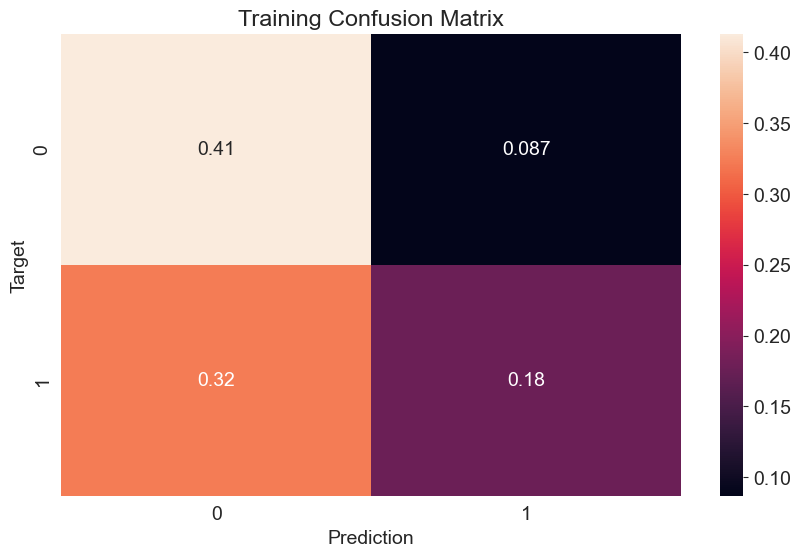

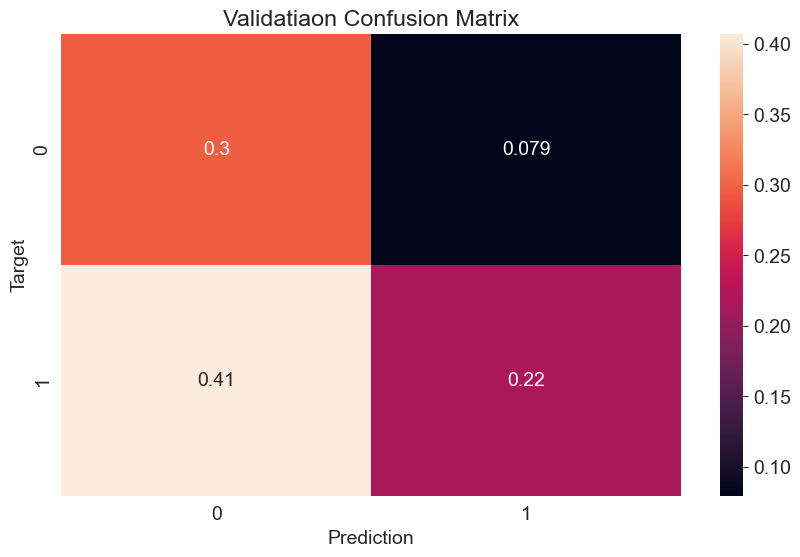

In [111]:
test_param(kernel='poly',C = 2,degree = 2)

In [216]:
row_num+=1

In [112]:
best_model.loc[row_num, 'Model'] = 'SVM'
best_model.loc[row_num, 'Training Accuracy'] = val[0]
best_model.loc[row_num, "Validation Accuracy"] = val[1]

best_model

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,65.098716,63.452088
1,Naive Bayes,50.312871,62.407862
2,Decision Tree,67.477614,61.609337
3,SVM,64.731902,62.366912


Training Accuracy: 55.90%
Validatiaon Accuracy: 56.12%


(55.90139173589384, 56.122031122031125)

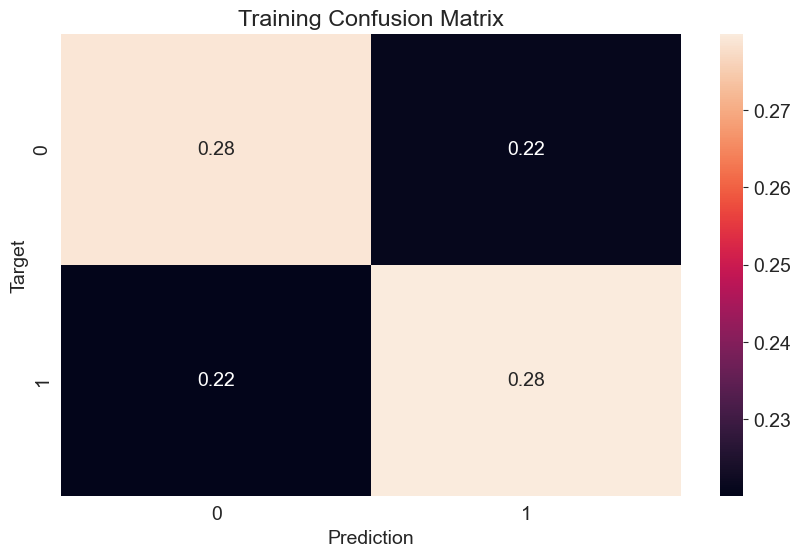

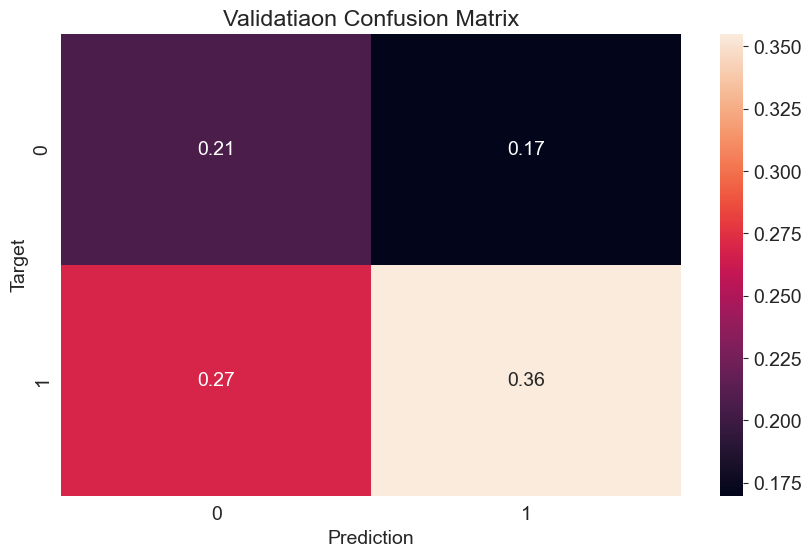

In [113]:
test_param(kernel='sigmoid',C = 3,degree = 2)

In [114]:
best_model

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,65.098716,63.452088
1,Naive Bayes,50.312871,62.407862
2,Decision Tree,67.477614,61.609337
3,SVM,64.731902,62.366912


<Axes: xlabel='Training Accuracy', ylabel='Model'>

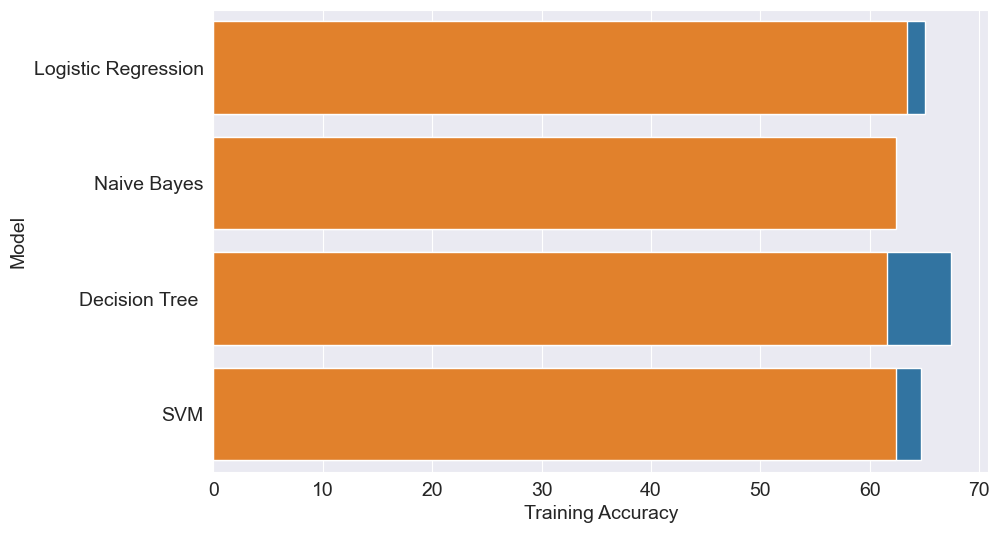

In [115]:
sns.barplot(data = best_model,y="Model",x="Training Accuracy")
sns.barplot(data = best_model,y="Model",x="Validation Accuracy")

In [116]:
best_model.set_index("Model",inplace=True)


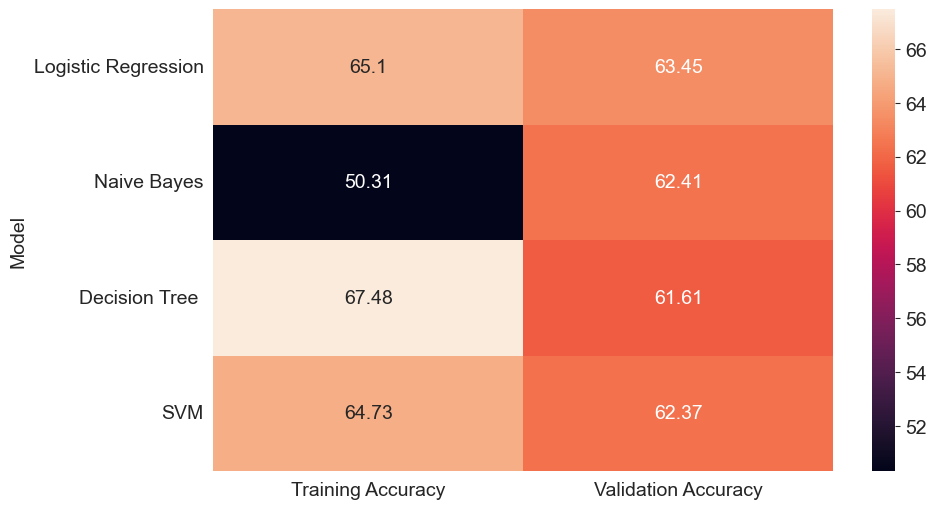

In [117]:
sns.heatmap(best_model, annot=True,fmt = "0.4g",cmap = "rocket");

# Xgboost classifier

In [118]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [119]:
def test_param():
    m = xgb.XGBClassifier(random_state=42, device = "cuda")
    m.fit(X_train, train_targets_sm)
    k = predict_and_plot(m,X_train, train_targets_sm, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k ,v

Training Accuracy: 86.57%
Validatiaon Accuracy: 63.62%


c:\Users\vpoother\OneDrive\OneDrive - JLR\Desktop\Hackathon\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [19:54:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


(86.57352465206603, 63.615888615888615)

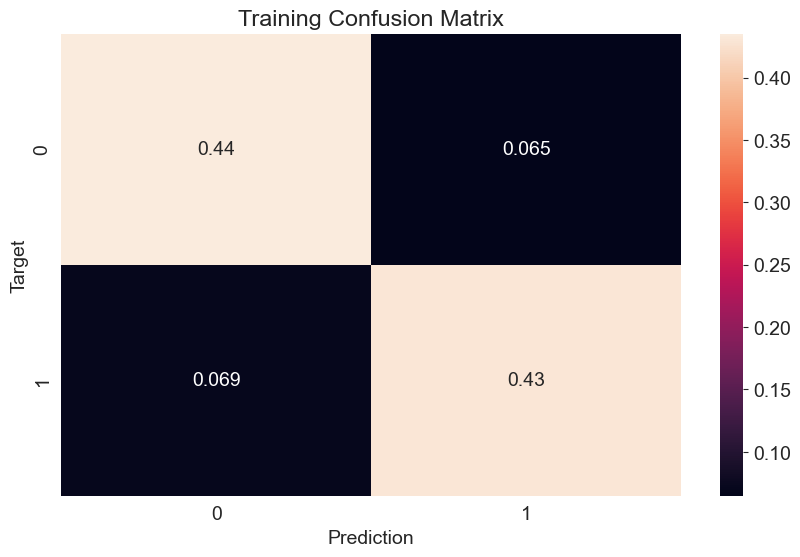

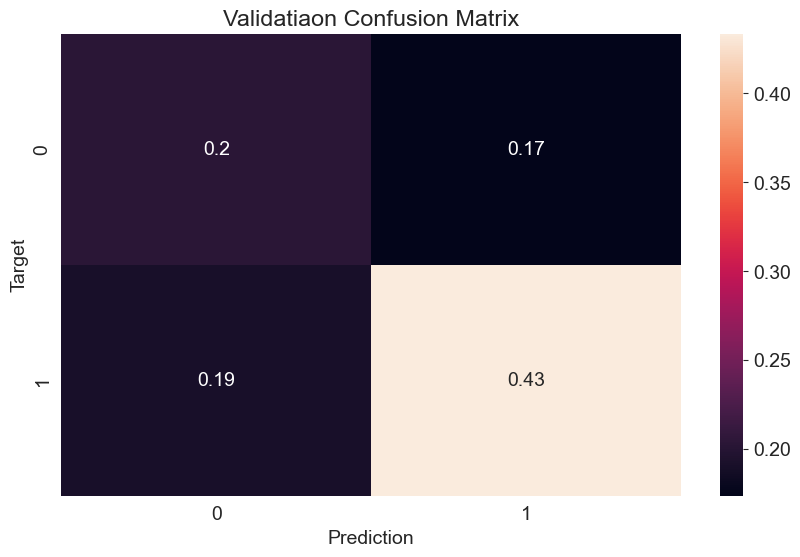

In [120]:
test_param()

# Lightgbm

In [136]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [137]:
def test_param():
    m = lgb.LGBMClassifier(random_state=42)
    m.fit(X_train, train_targets_sm)
    k = predict_and_plot(m,X_train, train_targets_sm, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k ,v

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9269, number of negative: 9269
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 18538, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Accuracy: 76.42%
Validatiaon Accuracy: 63.39%


(76.41601035710433, 63.39066339066339)

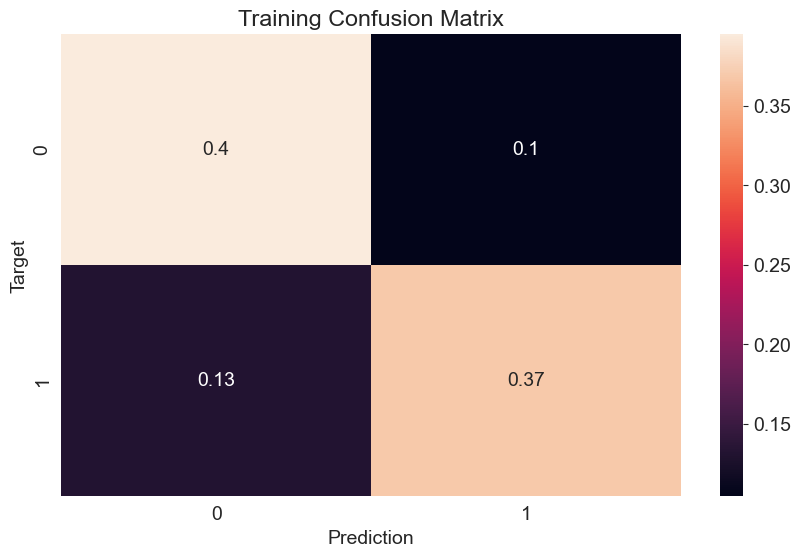

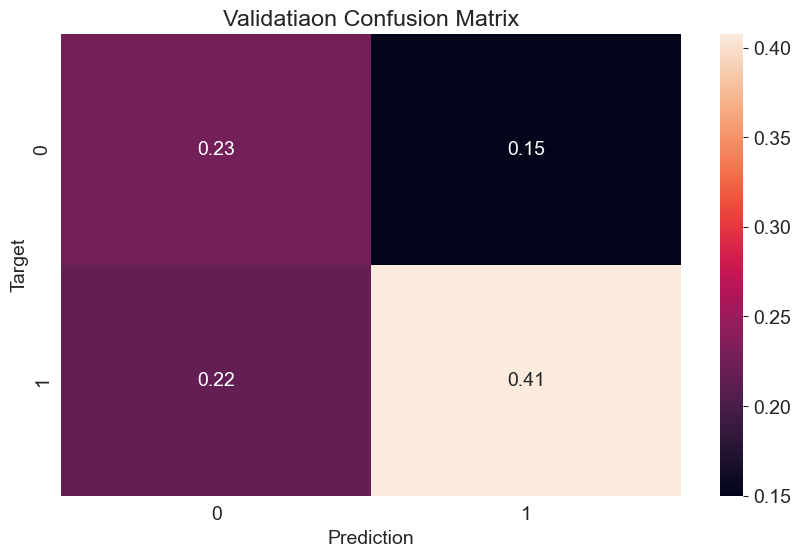

In [138]:
test_param()

# CatBoost classifier

In [139]:
from catboost import CatBoostClassifier

In [140]:
def test_param():
    m = CatBoostClassifier(verbose=0, task_type="GPU", iterations=500, random_state = 42, depth = 8, l2_leaf_reg = 0.1)
    m.fit(X_train, train_targets_sm)
    k = predict_and_plot(m,X_train, train_targets_sm, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k ,v

Training Accuracy: 73.17%
Validatiaon Accuracy: 64.37%


(73.17402092998167, 64.37346437346437)

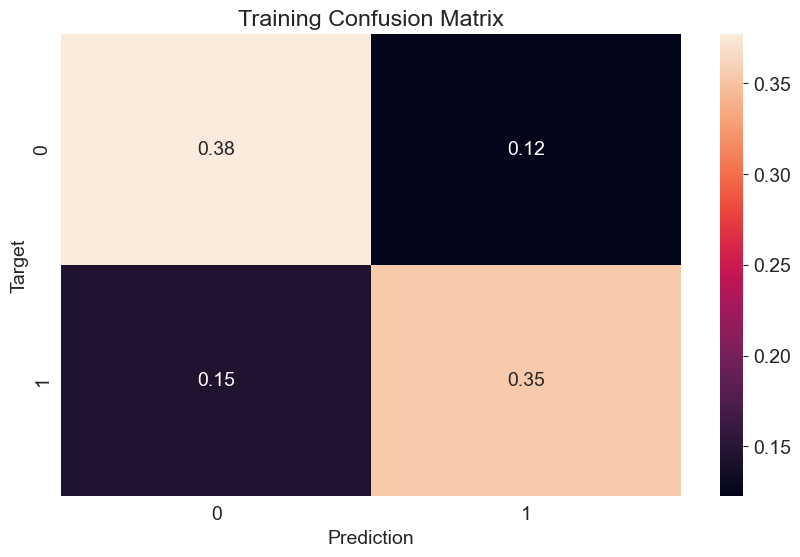

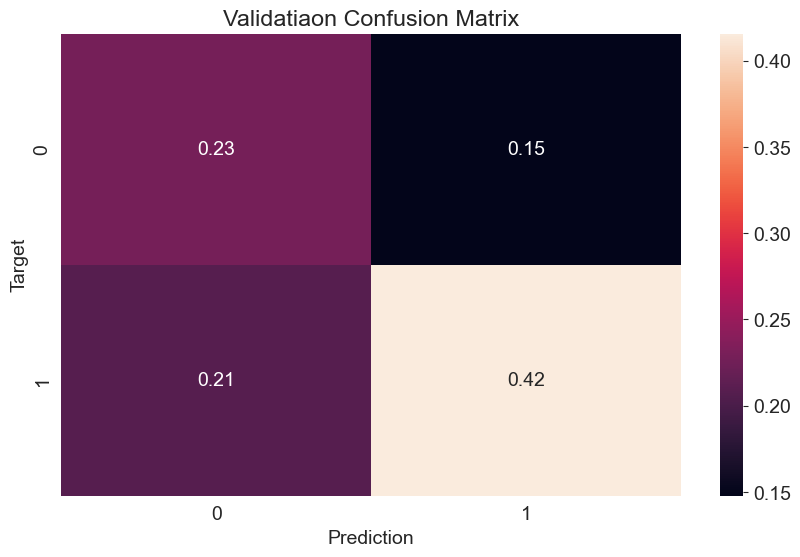

In [141]:
test_param()

# TabnetClassifier

In [142]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [143]:
def test_param():
    m = TabNetClassifier()
    m.fit(X_train.values, train_targets_sm, eval_set=[(X_val.values, val_targets)], eval_metric=['accuracy'])

    k = predict_and_plot(m,X_train.values, train_targets_sm, 'Training')
    v = predict_and_plot(m,X_val.values, val_targets, 'Validatiaon')
    return k ,v

c:\Users\vpoother\OneDrive\OneDrive - JLR\Desktop\Hackathon\.venv\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.68554 | val_0_accuracy: 0.61486 |  0:00:01s
epoch 1  | loss: 0.64983 | val_0_accuracy: 0.6163  |  0:00:02s
epoch 2  | loss: 0.64004 | val_0_accuracy: 0.61978 |  0:00:03s
epoch 3  | loss: 0.636   | val_0_accuracy: 0.62367 |  0:00:04s
epoch 4  | loss: 0.6345  | val_0_accuracy: 0.60934 |  0:00:06s
epoch 5  | loss: 0.63305 | val_0_accuracy: 0.61507 |  0:00:07s
epoch 6  | loss: 0.63497 | val_0_accuracy: 0.63022 |  0:00:08s
epoch 7  | loss: 0.63231 | val_0_accuracy: 0.6335  |  0:00:09s
epoch 8  | loss: 0.62875 | val_0_accuracy: 0.63043 |  0:00:10s
epoch 9  | loss: 0.62916 | val_0_accuracy: 0.63288 |  0:00:11s
epoch 10 | loss: 0.62907 | val_0_accuracy: 0.62797 |  0:00:12s
epoch 11 | loss: 0.62999 | val_0_accuracy: 0.6249  |  0:00:13s
epoch 12 | loss: 0.62729 | val_0_accuracy: 0.63063 |  0:00:14s
epoch 13 | loss: 0.62856 | val_0_accuracy: 0.63288 |  0:00:15s
epoch 14 | loss: 0.62925 | val_0_accuracy: 0.63657 |  0:00:16s
epoch 15 | loss: 0.62861 | val_0_accuracy: 0.63984 |  0

c:\Users\vpoother\OneDrive\OneDrive - JLR\Desktop\Hackathon\.venv\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Training Accuracy: 65.26%
Validatiaon Accuracy: 64.35%


(65.2605459057072, 64.35298935298935)

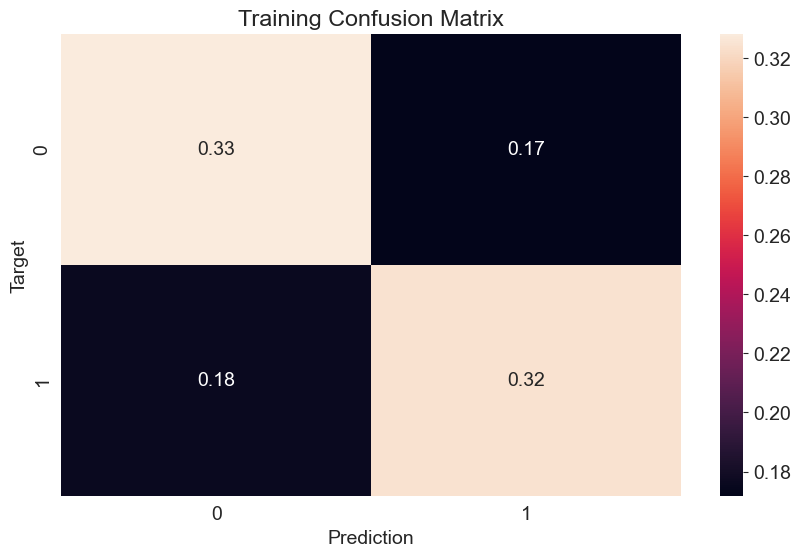

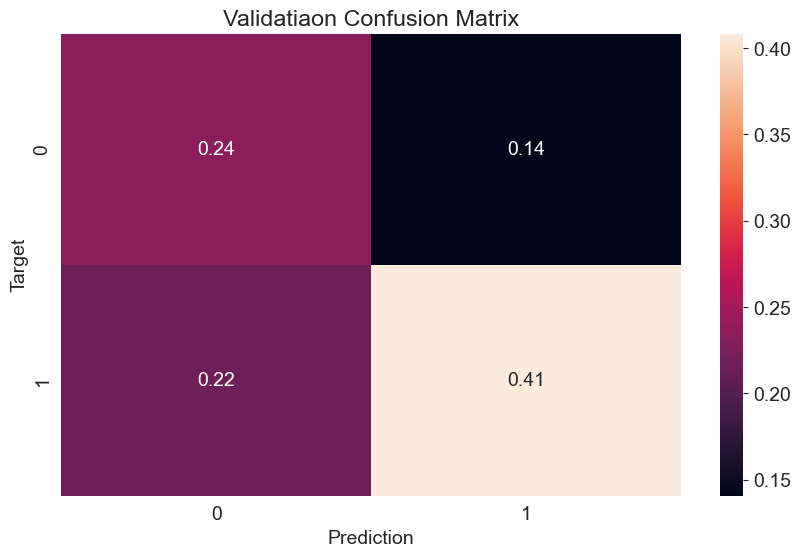

In [144]:
test_param()

# Final model

In [267]:
frames1 = [X_train,X_val]
frames2 = [train_targets_sm,val_targets] 
X = pd.concat(frames1)
Y = pd.concat(frames2)


In [268]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

svc = xgb.XGBClassifier(random_state=42, device = "cuda")


Cross_validated_ROC_AUC = cross_val_score(svc,X,Y, cv=4, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7319


## Stratified k-fold Cross Validation with shuffle split

In [283]:
from sklearn.model_selection import KFold

kfold=KFold(n_splits=7, shuffle=True, random_state=42)

svc = xgb.XGBClassifier(random_state=42, device = "cuda")

scores = cross_val_score(svc, X, Y, cv=kfold)

In [284]:
scores

array([0.66885834, 0.68081291, 0.68977884, 0.66228332, 0.68021518,
       0.68111178, 0.6775254 ])

In [285]:
print('Average final model score:{:.4f}'.format(scores.mean()))

Average final model score:0.6772


# predicting values for test data

In [286]:
X_test

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,inv_rpm,inv_lub_p,inv_fuel_p,inv_cool_p,inv_oil_temp,inv_coll_t,lub P/T,Coolant P/T,lub T/P,coolant T/P
828,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,0.116756,-0.000905,0.000472,-0.057590,0.433185,1.455459,-0.846401,0.806405,-0.003200,-0.065319
16075,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,0.494766,-0.075649,-0.025254,-0.100028,1.549360,0.511176,2.408109,3.462236,-0.079865,-0.099653
19179,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,0.225087,-0.041243,0.023735,0.001275,-3.161949,-0.122754,-0.273064,-0.639854,-0.029065,0.001707
13967,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,-0.148924,0.017936,-0.031683,0.004687,-0.046192,-0.681589,-1.175968,-0.746033,0.018290,0.011787
18294,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,0.143118,-0.043963,-0.020091,-0.067443,0.805837,2.028262,0.331847,1.346773,-0.047258,-0.076440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15094,-0.434370,1.512551,-0.584782,2.136229,0.069892,1.757304,0.147557,-0.068243,-0.007218,-0.089150,-0.113535,-1.610618,1.477476,1.562137,-0.068827,-0.079988
5215,-0.699687,0.306086,0.022140,-0.985802,-0.444236,-0.705696,0.500309,-0.045907,-0.028115,0.041088,0.437040,0.663742,0.360982,-0.906778,-0.047978,0.030132
16504,-0.370843,1.061614,-0.318231,0.517006,0.866578,-0.555643,0.073836,-0.061362,-0.017888,-0.058243,-0.923395,0.498652,0.902132,0.622340,-0.059499,-0.060567
12484,-0.950057,-1.174843,-0.331363,-1.207948,-1.099721,0.586179,0.918732,0.017295,-0.017427,0.079996,1.173405,-0.634849,-1.073048,-1.244484,0.010865,0.088229


In [321]:
final_model = xgb.XGBClassifier(random_state=42, device = "cuda")

In [322]:
final_model.fit(X,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [323]:
Y_pred = final_model.predict(X)

In [324]:
accuracy_score(Y,Y_pred)

0.8300742891298779

In [325]:
predicted_y_prob = final_model.predict_proba(X_test)

In [326]:
for i in range(40):
    val = 0.01 * i
    p = 0.3 + val
    predicted_y = predicted_y_prob[:, 1] >= p
    print("for ", p, accuracy_score(test_targets, predicted_y))

for  0.3 0.7350908625543896
for  0.31 0.7425134374200154
for  0.32 0.751215766572818
for  0.32999999999999996 0.7581264397235731
for  0.33999999999999997 0.7635014077297159
for  0.35 0.7652930637317635
for  0.36 0.770412080880471
for  0.37 0.77322754031226
for  0.38 0.7765549014589199
for  0.39 0.7806501151778859
for  0.4 0.786281034041464
for  0.41 0.7896083951881239
for  0.42 0.7919119529050422
for  0.43 0.794471461479396
for  0.44 0.7957512157665728
for  0.44999999999999996 0.7934476580496544
for  0.45999999999999996 0.794471461479396
for  0.47 0.7939595597645253
for  0.48 0.7949833631942667
for  0.49 0.7942155106219606
for  0.5 0.7901202969029947
for  0.51 0.7888405426158177
for  0.52 0.7878167391860763
for  0.53 0.7850012797542871
for  0.54 0.7788584591758383
for  0.55 0.7757870488866138
for  0.56 0.7729715894548247
for  0.5700000000000001 0.7729715894548247
for  0.5800000000000001 0.7699001791656002
for  0.59 0.7647811620168927
for  0.6 0.7581264397235731
for  0.61 0.751215766572

In [327]:
predicted_y = predicted_y_prob[:, 1] >= 0.45

In [328]:
accuracy_score(test_targets, predicted_y)

0.7934476580496544

Validatiaon Accuracy: 79.10%


79.0950040950041

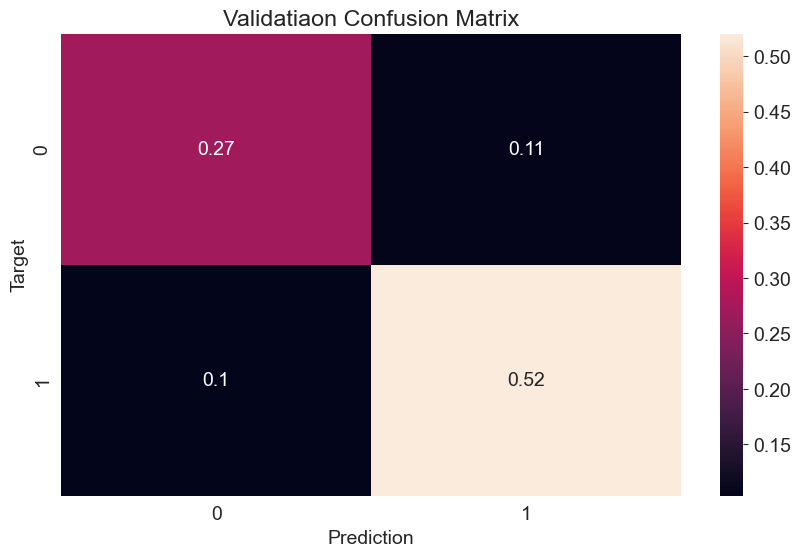

In [329]:
predict_and_plot(final_model,X_val, val_targets, 'Validatiaon')

Test Accuracy: 79.01%


79.01202969029947

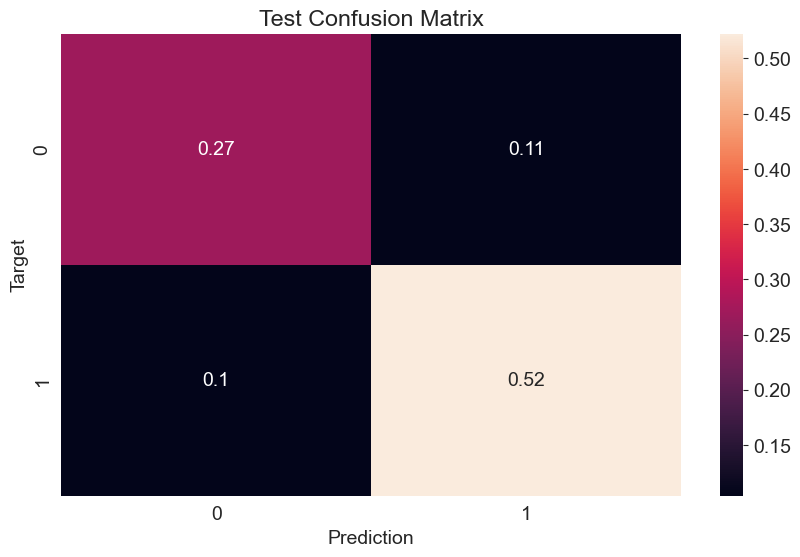

In [330]:
predict_and_plot(final_model,X_test, test_targets, 'Test')

# **Classification Report** 




**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model.

We can print a classification report as follows:-

In [355]:
final_model = xgb.XGBClassifier(random_state=42, device = "cuda")
final_model.fit(X, Y)
X_pred = final_model.predict(X)
test_preds = final_model.predict(X_test)
test_proba = final_model.predict_proba(X_test)
accuracy_score(test_targets, test_preds)

0.7901202969029947

In [356]:
from sklearn.metrics import classification_report

In [359]:
print(classification_report(X_pred,Y))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     10995
           1       0.84      0.84      0.84     12427

    accuracy                           0.83     23422
   macro avg       0.83      0.83      0.83     23422
weighted avg       0.83      0.83      0.83     23422



In [334]:
print(classification_report(test_targets,test_preds))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1459
           1       0.83      0.83      0.83      2448

    accuracy                           0.79      3907
   macro avg       0.78      0.78      0.78      3907
weighted avg       0.79      0.79      0.79      3907



In [335]:
final_model.classes_

array([0, 1])

### ROC Curve

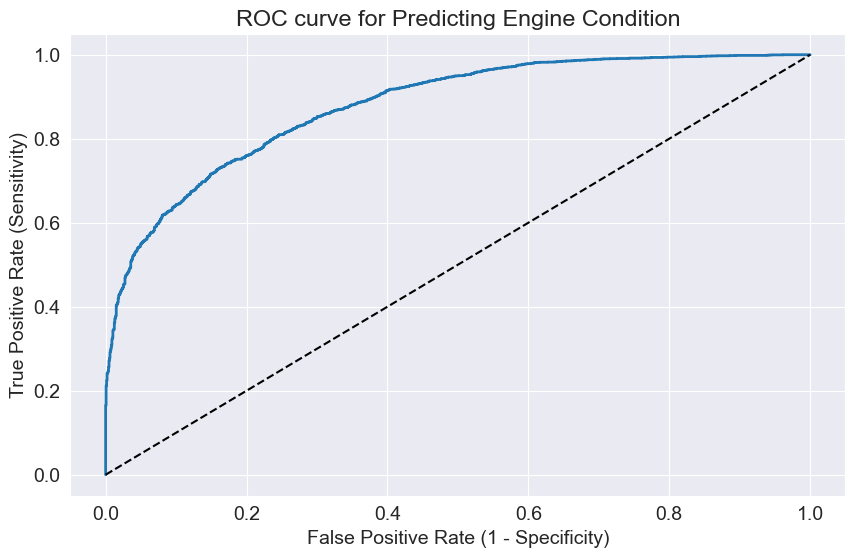

In [342]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_targets, test_proba[:, 1])

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for Predicting Engine Condition')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


### ROC  AUC

In [337]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(test_targets, test_proba[:, 1])

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8777


In [338]:
importances = final_model.feature_importances_
pd.Series(importances, index=X.columns).sort_values()

Lub oil pressure    0.033805
Coolant pressure    0.036485
Coolant temp        0.036921
Coolant P/T         0.037305
Engine rpm          0.039814
coolant T/P         0.040046
lub P/T             0.040370
inv_cool_p          0.040464
inv_coll_t          0.042582
lub oil temp        0.044756
inv_oil_temp        0.048882
inv_lub_p           0.052202
Fuel pressure       0.057853
lub T/P             0.066095
inv_fuel_p          0.097254
inv_rpm             0.285165
dtype: float32

In [339]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

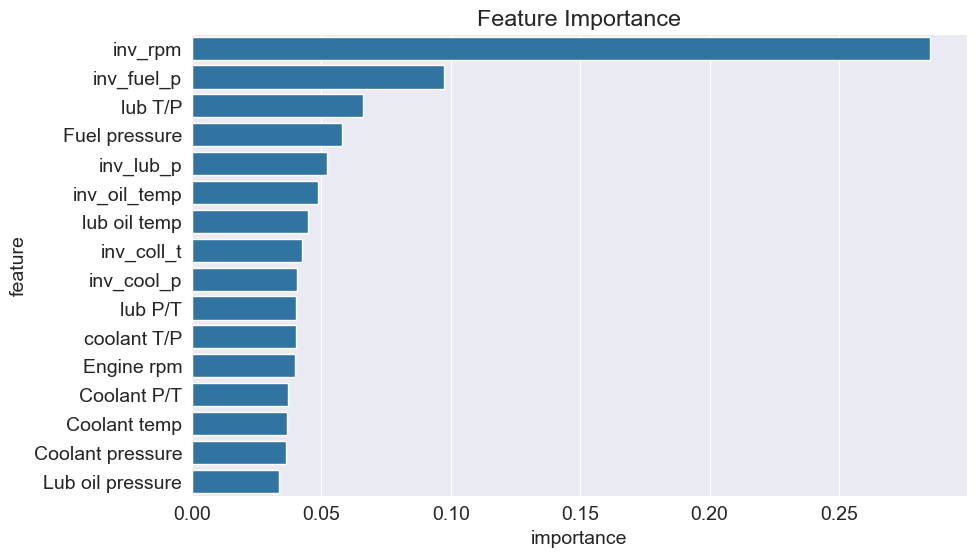

In [341]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');